In [123]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns

### Punto 1).

In [155]:
# Creando DataFrame
Path_ = '../../../../data/fit_curve.csv'
df_ = pd.read_csv(Path_,index_col='Unnamed: 0')
print(df_.shape)
df_.head()

(10, 2)


x    y
0  0  0.0
1  1  1.3
2  2  2.6
3  3  3.9
4  4  5.2

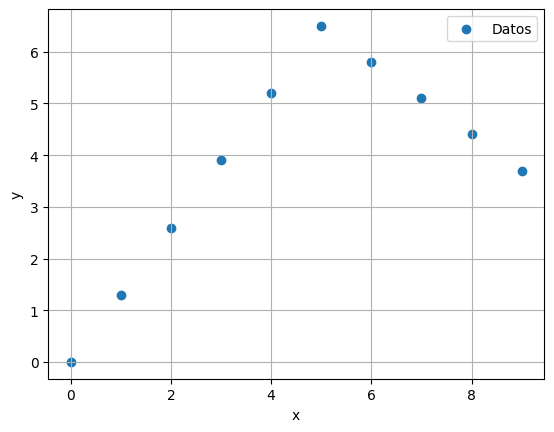

In [25]:
# Convertimos las columnas a arreglos de numpy
X = df_['x'].values
Y = df_['y'].values

# Grafica de los datos 
plt.scatter(X,Y,label='Datos')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Como se observa, los datos no siguen una distribución común. Se propone ajustarlos a un polinomio de grado 3

In [237]:
# Definimos funciones a utilizar
def chi2(params,fun):
    return np.sum(np.square(Y-fun(X,*params)))

def Pol3(x,a,b,c,d): # Ajuste Propuesto
    return a*x**3 + b*x**2 + c*x+d

def Gauss(x,norm,mean,sigma): # Distribución Gaussiana
    return norm * np.exp(-(x-mean)**2/(2*sigma**2))

def GaussPol(x,b,norm,mean,sigma): # Distribución Gaussiana + Polinomio de la forma (x + b)
    return x + b + Gauss(x,norm,mean,sigma)

# Buscando proponer el ajuste, veamos que sucede cuando agregamos un 
# parámetro adicional a la anterior función
def GaussPol2(x,a,b,norm,mean,sigma): # Distribución Gaussiana + Polinomio de la forma (ax + b)
    return a*x + b + Gauss(x,norm,mean,sigma)

def Minimize_and_Graphics(Function,Params_Init):

    # Minimizar chi2
    Results = minimize(chi2,Params_Init,args=(Function))
    print('Parámetros encontrados: ',Results.x)

    # Calculando el error
    Error = (Function(X,*Results.x)-Y)
    Chi2_Fit= chi2(Results.x,Function)
    print('Chi2 encontrado: ',round(Chi2_Fit,4))

    # Gráficas:
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    fig.suptitle('Ajuste de curva y errores de fiteo')

    # Grafica de los datos y ajuste
    X_array = np.linspace(X.min(),X.max(),100)

    ax[0].scatter(X,Y,label='Datos')
    ax[0].plot(X_array,Function(X_array,*Results.x),c='orange',label='Ajuste')
    ax[0].grid()
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].legend()

    # Grafica de los errores
    ax[1].scatter(X,Error,label="Error data")
    ax[1].hlines(0,X.min()-0.1,X.max()+0.1,color='k')
    ax[1].legend()
    ax[1].grid()
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('$\Delta y$')

    return Results.x

Parámetros encontrados:  [-0.0097144  -0.0582497   1.70822831 -0.20974463]
Chi2 encontrado:  1.3753


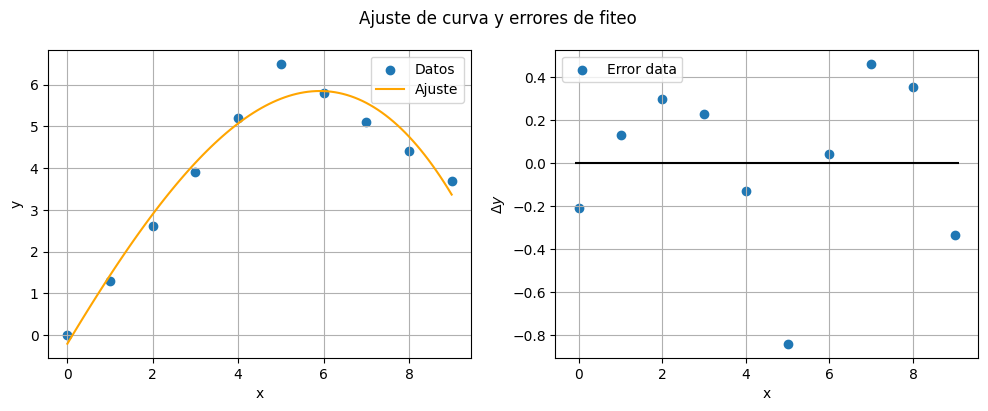

In [239]:
# Funcion propuesta
ResultPol = Minimize_and_Graphics(Pol3,[1,1,1,1])

Parámetros encontrados:  [6.19486272 5.74654894 2.78281484]
Chi2 encontrado:  1.5818


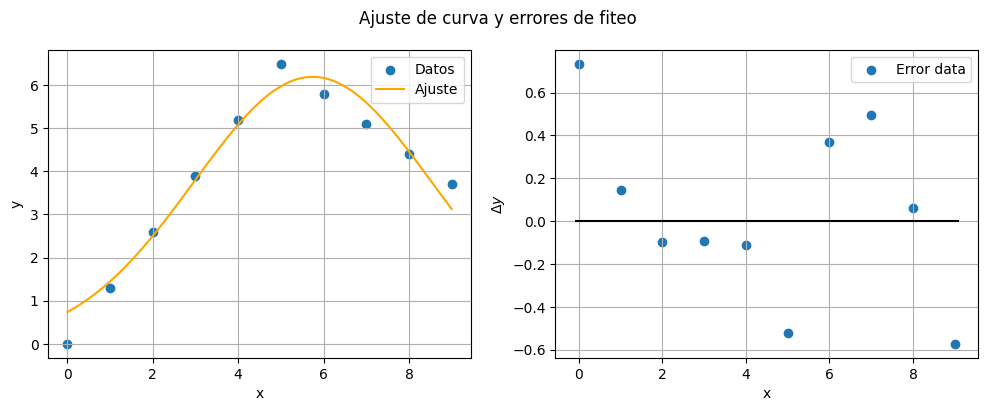

In [240]:
# Funcion Gausiana
ResultGauss = Minimize_and_Graphics(Gauss,[1,1,1])

Parámetros encontrados:  [-517.60392855  518.91742029    3.05233716   36.89930678]
Chi2 encontrado:  1.6706


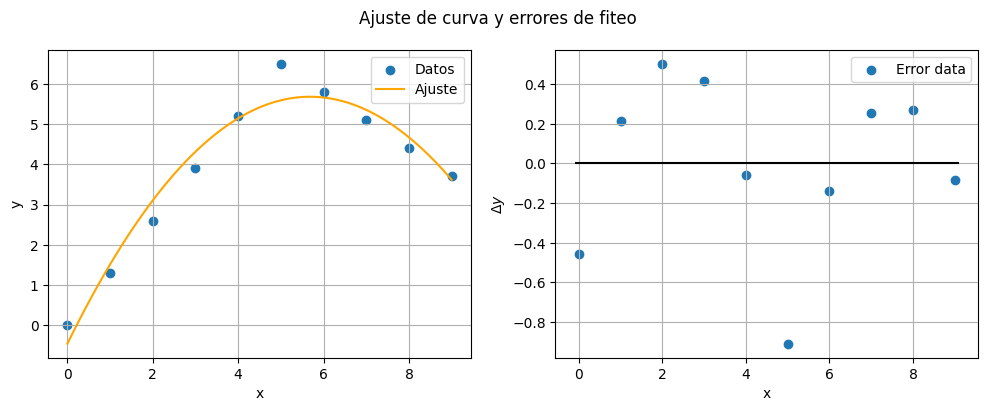

In [111]:
# Gausiana más polinomio (x+b)
ResultGaussPol = Minimize_and_Graphics(GaussPol,[1,1,1,1])

Parámetros encontrados:  [ 0.34397327 -0.36322877  4.75304595  4.90134267  2.31023243]
Chi2 encontrado:  0.3267


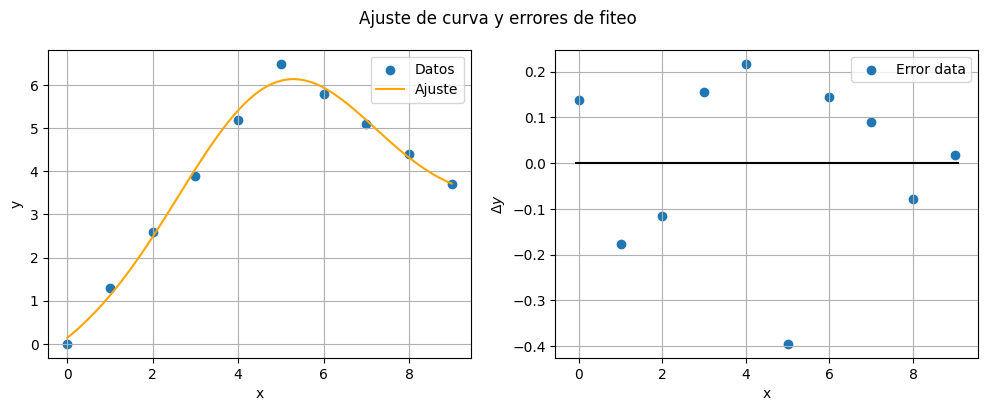

In [241]:
# Gausiana mas polinomio (ax+b)
ResultGaussPol2 = Minimize_and_Graphics(GaussPol2,[0,1,1,1,1,])

# ¡El Chi2 disminuye considerablemente!

Cuando proponemos que el ajuste sea un polinomio de grado 1 + una distribución gaussiana, los valores de **norm**, **mean** y **sigma** tienden a ser mucho más pequeños que con las funciones propuestas anteriormente, al igual de la considerable mejora del $\chi²$

### Punto 2).

In [160]:
# Creando DataFrame
Path = '../../../../data/auto.csv'
df = pd.read_csv(Path,index_col='Unnamed: 0')
print(df.shape)
df.head()

(201, 29)


symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [118]:
# Verificando la cantidad de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [161]:
# Eliminando datos nulos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          196 non-null    int64  
 1   normalized-losses  196 non-null    int64  
 2   make               196 non-null    object 
 3   aspiration         196 non-null    object 
 4   num-of-doors       196 non-null    object 
 5   body-style         196 non-null    object 
 6   drive-wheels       196 non-null    object 
 7   engine-location    196 non-null    object 
 8   wheel-base         196 non-null    float64
 9   length             196 non-null    float64
 10  width              196 non-null    float64
 11  height             196 non-null    float64
 12  curb-weight        196 non-null    int64  
 13  engine-type        196 non-null    object 
 14  num-of-cylinders   196 non-null    object 
 15  engine-size        196 non-null    int64  
 16  fuel-system        196 non

In [162]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

Al no tener documentación de la base, no tenemos información de la columna 'symboling', se filtra esta columna.

In [163]:
df.drop('symboling',axis=1,inplace=True)
df.columns

Index(['normalized-losses', 'make', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [242]:
df.dtypes 

normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [164]:
df.describe()

normalized-losses  wheel-base      length       width      height  \
count         196.000000  196.000000  196.000000  196.000000  196.000000   
mean          121.428571   98.852041    0.837183    0.914846   53.882143   
std            32.149650    6.118651    0.059556    0.029181    2.365031   
min            65.000000   86.600000    0.678039    0.837500   48.800000   
25%            97.250000   94.500000    0.799135    0.889931   52.000000   
50%           122.000000   97.000000    0.832292    0.909028   54.100000   
75%           134.750000  102.400000    0.881788    0.926042   55.625000   
max           256.000000  120.900000    1.000000    1.000000   59.800000   

       curb-weight  engine-size        bore      stroke  compression-ratio  \
count    196.00000   196.000000  196.000000  196.000000         196.000000   
mean    2551.50000   126.969388    3.329643    3.259439          10.173061   
std      513.79767    38.807468    0.271071    0.318079           4.053371   
min     1488.00000    61.000000    2.540000    2.070000           7.000000   
25%     2145.00000    98.000000    3.150000    3.110000           8.500000   
50%     2417.00000   120.000000    3.310000    3.290000           9.000000   
75%     2928.25000   142.000000    3.590000    3.410000           9.400000   
max     4066.00000   308.000000    3.940000    4.170000          23.000000   

       horsepower     peak-rpm    city-mpg  highway-mpg         price  \
count  196.000000   196.000000  196.000000   196.000000    196.000000   
mean   102.472002  5100.258872   25.413265    30.913265  13094.658163   
std     36.012855   467.021518    6.327606     6.738913   7875.984533   
min     48.000000  4150.000000   14.000000    16.000000   5118.000000   
25%     70.000000  4800.000000   20.000000    25.000000   7765.750000   
50%     95.000000  5112.684729   25.000000    30.000000  10096.500000   
75%    116.000000  5500.000000   30.000000    34.500000  16500.750000   
max    207.000000  6600.000000   49.000000    54.000000  45400.000000   

       city-L/100km      diesel         gas  
count    196.000000  196.000000  196.000000  
mean       9.819073    0.102041    0.897959  
std        2.426332    0.303477    0.303477  
min        4.795918    0.000000    0.000000  
25%        7.833333    0.000000    1.000000  
50%        9.400000    0.000000    1.000000  
75%       11.750000    0.000000    1.000000  
max       16.785714    1.000000    1.000000

A partir de lo anterior se puede notar que la columna **normalized-losses** no está normalizada a pesar de que su nombre lo indique; por el contrario sí lo están otras columnas como: **length**, **width**.

<Axes: >

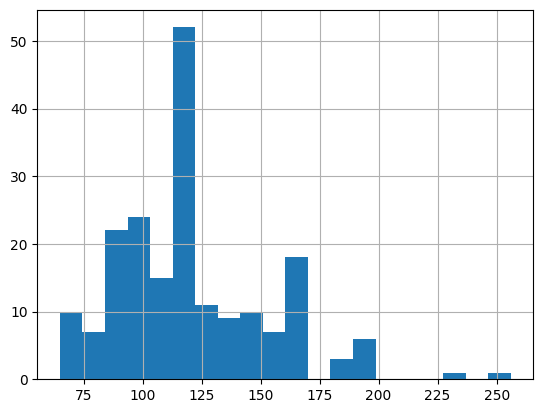

In [167]:
# Veamos como se comporta 'normalized-losses'
df['normalized-losses'].hist(bins=20)

La mayoría de los autos tienen pérdidas entre ~80 y ~170 con media en 121, la cual dobla la cantidad de ocurrencias comparada con cualquier otro valor

<Axes: >

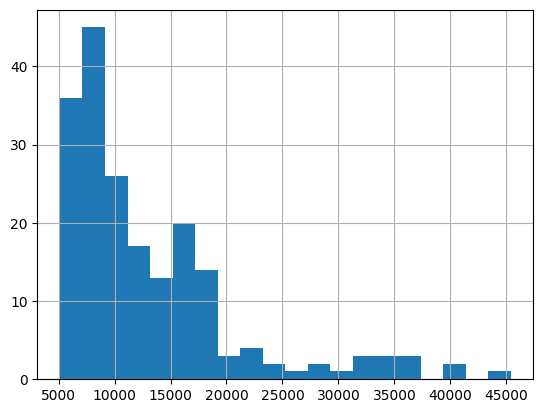

In [168]:
df['price'].hist(bins=20)

Se puede notar una relación exponencialmente decreciente entre número de autos y su precio. Lo cual se podría entender como la dificultad de compra de un auto a medida que aumenta el precio; por tanto en el mercado su venta es menor.

In [200]:
df['make'].value_counts()

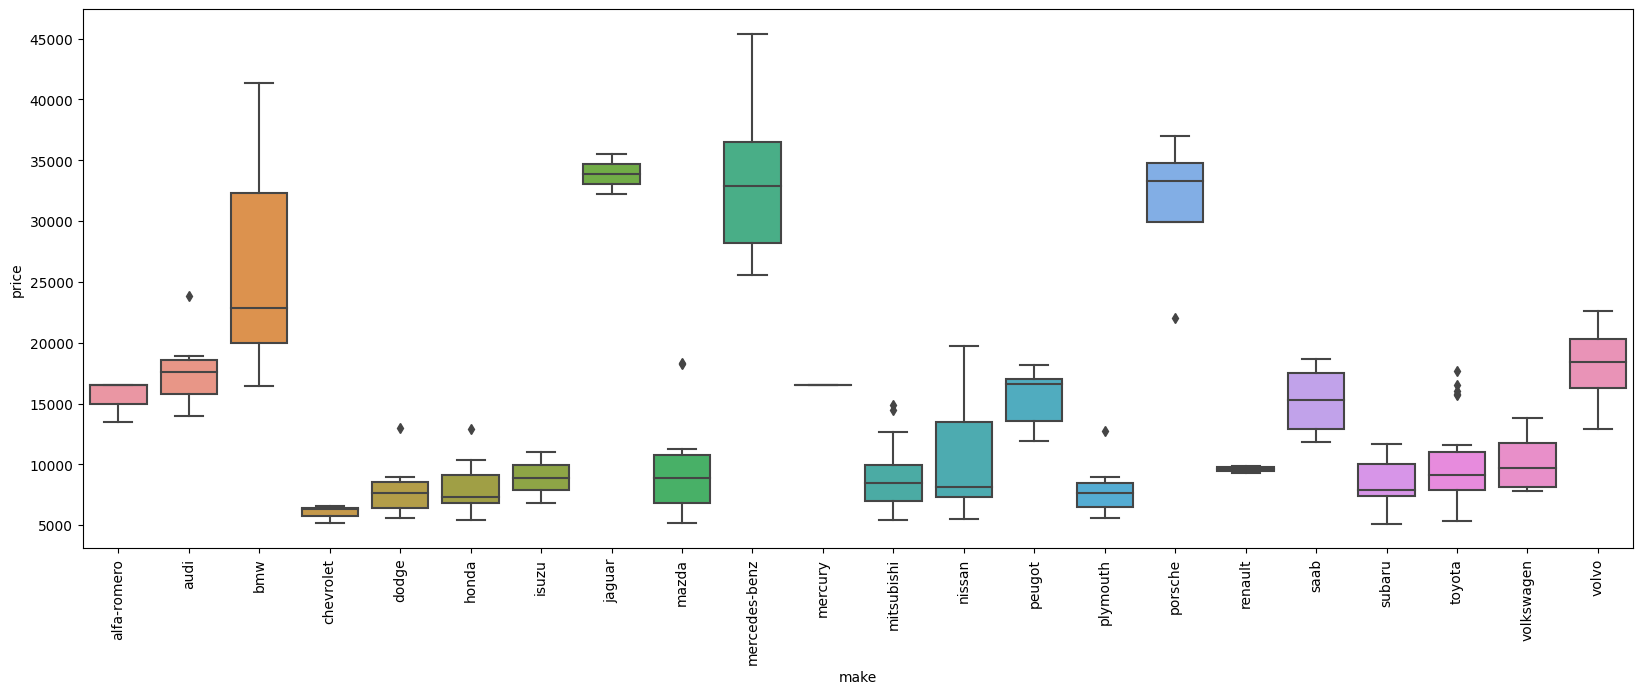

In [171]:
# Realicemos un Box Plot para ver como se comporta el precio para cada marca de autos
plt.figure(figsize=(20,7))
ax = sns.boxplot(x="make", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Con este gráfico se puede observar los rangos de precios que tienen cada marca para los autos en el dataset utilizado. Existen algunas marcas que manejan un rango de precios bastante limitado y alto, como en el caso de jaguar, mercedes-benz y porshe. Mientras que otras marcas tienen un rango de precios más bajo, como son chevrolet, dodge, honda, isuzu, ets. Marcas como BMW tienen un rango más amplio pero más orientado a la gama media.
Aún así, al tener tan pocos datos de algunas marcas (menos de 10), es bastante limitadas las conclusiones que se pueden sacar de este análisis.

<Axes: title={'center': 'Gráfica de dispersión'}, xlabel='body-style', ylabel='engine-size'>

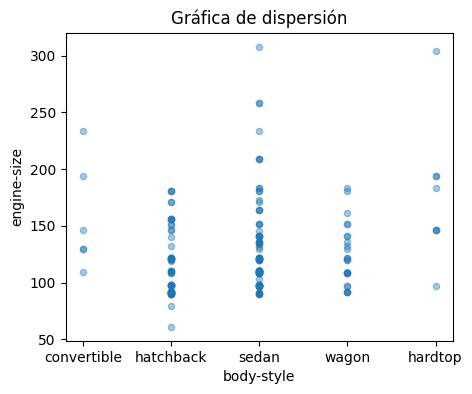

In [190]:
df.plot(kind='scatter', y = 'engine-size', x = 'body-style', title = "Gráfica de dispersión", alpha = 0.4, figsize=(5,4))

Podemos notar que en general los autos con body style tipo sedan y hardtop pueden tener un tamaño de motor mayor a 250 y parece haber una rendencia a que el tamaño de motor esté entre 100 y 150.

### Informe

Comencemos analizando las correlaciones entre todas las columnas

/tmp/ipykernel_112182/1313641781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=False,cmap="crest")


<Axes: >

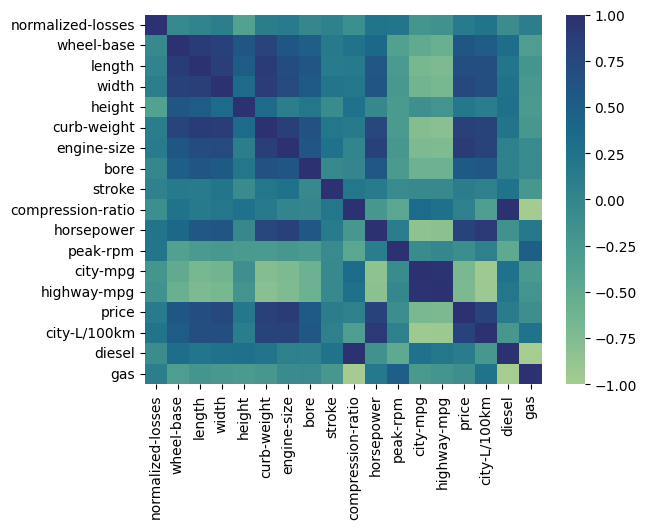

In [195]:
sns.heatmap(df.corr(),annot=False,cmap="crest")

Se nota una fuerte correlación entre las variables: wheel-base, length y width y de igual manera entre compression-ratio y los autos con diesel; pero algo que puede ser importante es city_L/100km y el precio. Se va a analizar a continuación

<Figure size 1000x700 with 0 Axes>

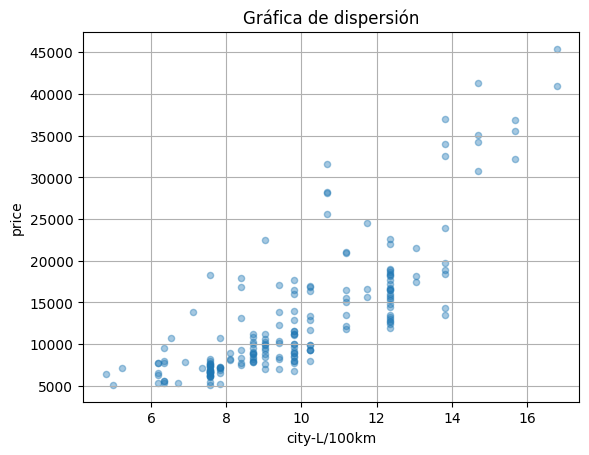

In [199]:
# Gráfica de dispersión
plt.figure(figsize=(10,7))
df.plot(kind='scatter', y = 'price', x = 'city-L/100km', title = "Gráfica de dispersión", alpha = 0.4)
plt.grid()

Parámetros encontrados:  [  2608.70355424 -12520.3531607 ]


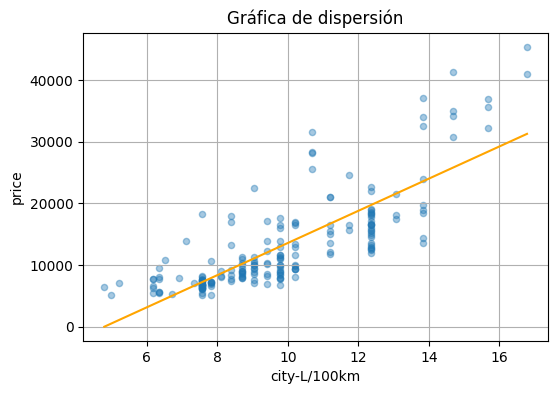

In [236]:
def Fit_Data(x,a,b): return a*x+b

def chi2_Data(params,fun):
    return np.sum(np.square(df['price'].values-fun(df['city-L/100km'].values,*params)))

# Minimizar chi2
Results = minimize(chi2_Data,[1,1],args=(Fit_Data))
print('Parámetros encontrados: ',Results.x)

# Gráficas:
fig,ax = plt.subplots(1,1,figsize=(6,4))

# Grafica de los datos 
df.plot(kind='scatter', y = 'price', x = 'city-L/100km', title = "Gráfica de dispersión", alpha = 0.4,ax=ax)

# Grafica del ajuste
X_array = np.linspace(df['city-L/100km'].values.min(),df['city-L/100km'].values.max(),100)
ax.plot(X_array,Fit_Data(X_array,*Results.x),c='orange',label='Ajuste')

ax.grid()

Al ajustar los datos se encuentra que su dependecia es algo más que lineal; difiere enormemente a medida que se aumenta el city-L/100km.

 Veamos que ocurre cuando el precio es $>30000$

In [218]:
df_1 = df[df['price']>30000]
df_1.head()

normalized-losses    make aspiration num-of-doors body-style drive-wheels  \
14                122     bmw        std         four      sedan          rwd   
15                122     bmw        std          two      sedan          rwd   
16                122     bmw        std         four      sedan          rwd   
44                145  jaguar        std         four      sedan          rwd   
45                122  jaguar        std         four      sedan          rwd   

   engine-location  wheel-base    length     width  ...  compression-ratio  \
14           front       103.5  0.908217  0.929167  ...                8.0   
15           front       103.5  0.931283  0.943056  ...                8.0   
16           front       110.0  0.946660  0.984722  ...                8.0   
44           front       113.0  0.959154  0.966667  ...                8.1   
45           front       113.0  0.959154  0.966667  ...                8.1   

    horsepower peak-rpm city-mpg  highway-mpg    price  city-L/100km  \
14       182.0   5400.0       16           22  30760.0     14.687500   
15       182.0   5400.0       16           22  41315.0     14.687500   
16       182.0   5400.0       15           20  36880.0     15.666667   
44       176.0   4750.0       15           19  32250.0     15.666667   
45       176.0   4750.0       15           19  35550.0     15.666667   

    horsepower-binned  diesel  gas  
14               High       0    1  
15               High       0    1  
16               High       0    1  
44               High       0    1  
45               High       0    1  

[5 rows x 28 columns]

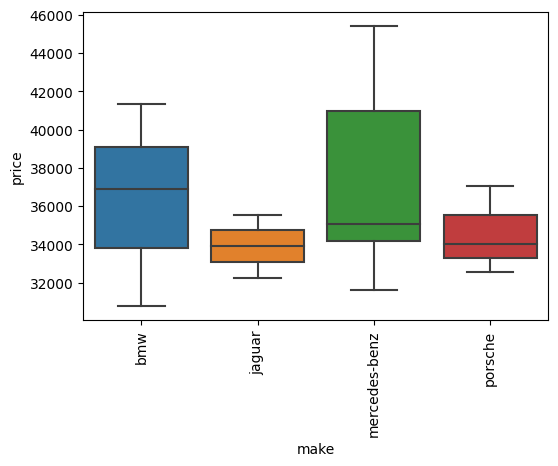

In [216]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="make", y="price", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [221]:
df_1['drive-wheels'].value_counts()

rwd    13
Name: drive-wheels, dtype: int64

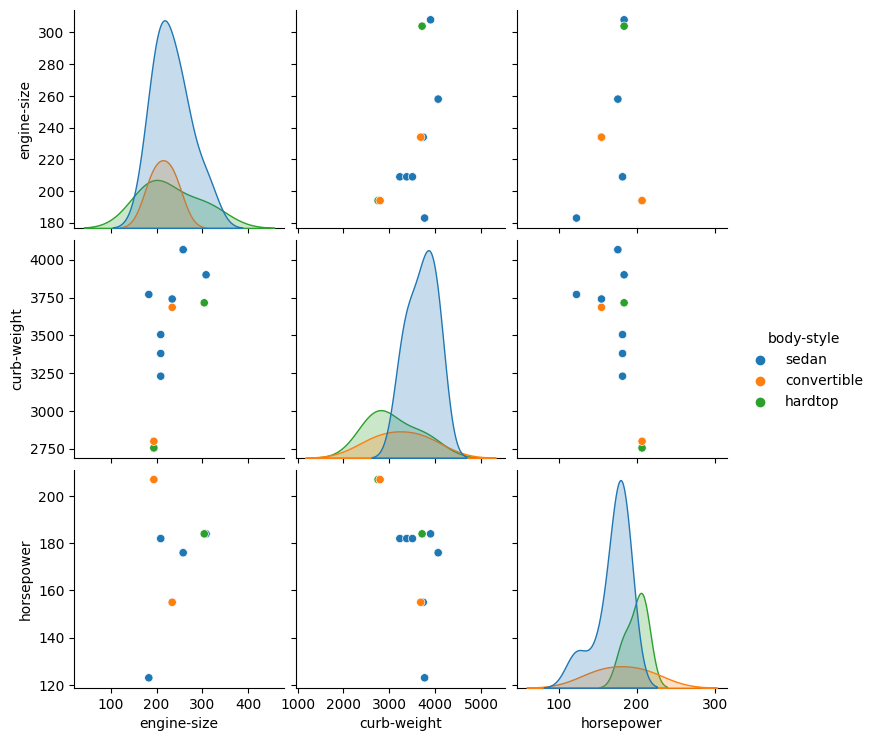

In [230]:
sns.pairplot(df_1, hue = "body-style", vars = ["engine-size","curb-weight","horsepower"])

Notamos que los autos con alto city-L/100km y precio son únicamente ruedas de tipo rwd y en estos rangos solo aparecen cuatro marcas: bmw, jaguar, mercedes-benz y porshe. En la última gráfica se concluye que las columnas de engine-size, curb-weight, horsepower no están tan correlacionadas entre sí en este rango de precios.

#### Conclusión.

Por tanto afirmamos que la medida de city-L/100km es de real importancia a la hora de determinar el precio de un auto y su dependencia parece ser exponencial; de manera que en precios realmente altos su alto valor definitivo. Igualmente los autos con precios elevados tienen unicamente ruedas de tipo rwd. De esta manera, se recomiendaría analizar la variación de costo que tiene aumentar el city-L/100km a fin de que con posibles estrategias de marketing se pueda incentivar las ventas de este tipo de auto.